# LSTM과 GRU 셀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 74ms/step - loss: 0.6920 - accuracy: 0.5429 - val_loss: 0.6907 - val_accuracy: 0.5874
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6879 - accuracy: 0.6175 - val_loss: 0.6848 - val_accuracy: 0.6450
Epoch 3/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6759 - accuracy: 0.6683 - val_loss: 0.6629 - val_accuracy: 0.6912
Epoch 4/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6187 - accuracy: 0.7158 - val_loss: 0.5881 - val_accuracy: 0.7244
Epoch 5/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5712 - accuracy: 0.7402 - val_loss: 0.5639 - val_accuracy: 0.7366
Epoch 6/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5483 - accuracy: 0.7535 - val_loss: 0.5437 - val_accuracy: 0.7526
Epoch 7/100
313/313 [==============================] - 22s 71ms/step - loss: 0.5284 - accuracy: 0.7625 - val_loss: 0.5255 - val_ac

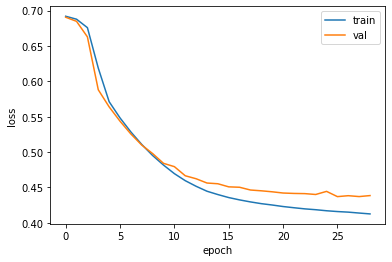

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 19ms/step - loss: 0.6925 - accuracy: 0.5301 - val_loss: 0.6919 - val_accuracy: 0.5758
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6905 - accuracy: 0.5936 - val_loss: 0.6889 - val_accuracy: 0.6326
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6849 - accuracy: 0.6265 - val_loss: 0.6784 - val_accuracy: 0.6342
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6573 - accuracy: 0.6493 - val_loss: 0.6278 - val_accuracy: 0.6984
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6133 - accuracy: 0.7247 - val_loss: 0.5956 - val_accuracy: 0.7432
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5901 - accuracy: 0.7429 - val_loss: 0.5799 - val_accuracy: 0.7542
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5742 - accuracy: 0.7555 - val_loss: 0.5645 - val_accuracy:

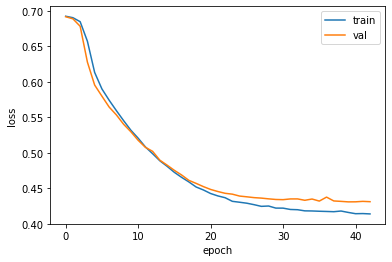

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 43ms/step - loss: 0.6924 - accuracy: 0.5373 - val_loss: 0.6909 - val_accuracy: 0.6096
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6859 - accuracy: 0.6146 - val_loss: 0.6751 - val_accuracy: 0.6384
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6321 - accuracy: 0.6715 - val_loss: 0.5885 - val_accuracy: 0.7162
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5677 - accuracy: 0.7263 - val_loss: 0.5461 - val_accuracy: 0.7452
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5373 - accuracy: 0.7451 - val_loss: 0.5210 - val_accuracy: 0.7584
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5195 - accuracy: 0.7579 - val_loss: 0.5021 - val_accuracy: 0.7710
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5040 - accuracy: 0.7650 - val_loss: 0.4910 - val_ac

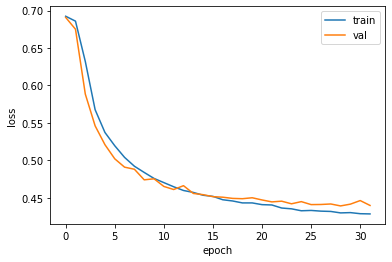

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6926 - accuracy: 0.5246 - val_loss: 0.6922 - val_accuracy: 0.5318
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6908 - accuracy: 0.5620 - val_loss: 0.6902 - val_accuracy: 0.5582
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6881 - accuracy: 0.5876 - val_loss: 0.6872 - val_accuracy: 0.5782
Epoch 4/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6839 - accuracy: 0.6055 - val_loss: 0.6827 - val_accuracy: 0.5974
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6779 - accuracy: 0.6206 - val_loss: 0.6762 - val_accuracy: 0.6070
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6693 - accuracy: 0.6353 - val_loss: 0.6669 - val_accuracy: 0.6196
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6570 - accuracy: 0.6450 - val_loss: 0.6540 - val_accuracy:

313/313 [==============================] - 9s 28ms/step - loss: 0.4093 - accuracy: 0.8190 - val_loss: 0.4382 - val_accuracy: 0.7962
Epoch 58/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4090 - accuracy: 0.8195 - val_loss: 0.4371 - val_accuracy: 0.7982
Epoch 59/100
313/313 [==============================] - 7s 24ms/step - loss: 0.4086 - accuracy: 0.8187 - val_loss: 0.4392 - val_accuracy: 0.7984
Epoch 60/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4086 - accuracy: 0.8180 - val_loss: 0.4367 - val_accuracy: 0.7996
Epoch 61/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4082 - accuracy: 0.8183 - val_loss: 0.4365 - val_accuracy: 0.7982
Epoch 62/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4077 - accuracy: 0.8181 - val_loss: 0.4360 - val_accuracy: 0.7994
Epoch 63/100
313/313 [==============================] - 8s 24ms/step - loss: 0.4074 - accuracy: 0.8192 - val_loss: 0.4360 - val_accuracy: 0.800

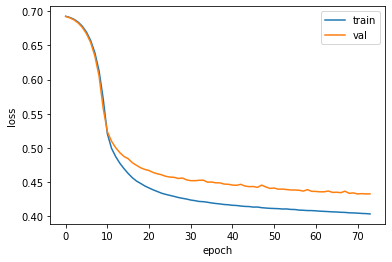

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 마무리

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4343 - accuracy: 0.7989


[0.43428707122802734, 0.7989199757575989]